In [1]:
path_results = "./output/PINEAPPLES_ALL_METHODS_COVARIANCE/seed0/1_100/fewshotMahalanobis_regularization_beta_1_lambda_1.0@xcit_nano_12_p8_224.fb_dist_in1k@fastsam@svd_16/bbox_results.json"
path_results_test = "./output/PINEAPPLES_ALL_METHODS_COVARIANCE/seed0/1_100/fewshotMahalanobis_regularization_beta_1_lambda_1.0@xcit_nano_12_p8_224.fb_dist_in1k@fastsam@svd_16/test.json"
path_root_img = "./pineapples_5m/train2017/"

In [2]:
import json

# Load the JSON file
with open(path_results, 'r') as f:
    data = json.load(f)

with open(path_results_test, 'r') as f:
    data_test = json.load(f)

In [3]:
data_test

{'info': {'year': '2023',
  'version': '2',
  'description': 'Exported from roboflow.ai',
  'contributor': '',
  'url': 'https://app.roboflow.ai/datasets/pineapples_1/2',
  'date_created': '2023-07-21T17:37:02+00:00'},
 'licenses': [{'id': 1, 'url': '', 'name': 'Unknown'}],
 'categories': [{'id': 0, 'name': 'pineapples', 'supercategory': 'none'},
  {'id': 1, 'name': '0', 'supercategory': 'pineapples'}],
 'images': [{'id': 0,
   'license': 1,
   'file_name': '00000153_JPG.rf.0419954a1ccd2cab9d81caa236b97984.jpg',
   'height': 1300,
   'width': 1600,
   'date_captured': '2023-07-21T17:37:02+00:00'},
  {'id': 1,
   'license': 1,
   'file_name': '00000048_JPG.rf.05d7cd3db8cc90d3e439f498e0a330af.jpg',
   'height': 1300,
   'width': 1600,
   'date_captured': '2023-07-21T17:37:02+00:00'},
  {'id': 2,
   'license': 1,
   'file_name': '00000077_JPG.rf.02c4dd4870fa350c9f6d9f7eed36f44a.jpg',
   'height': 1300,
   'width': 1600,
   'date_captured': '2023-07-21T17:37:02+00:00'},
  {'id': 4,
   'lic

In [4]:
unique_image_ids = set(item['image_id'] for item in data)

In [5]:
def get_filename_by_id(image_id, data_test):
    for image in data_test['images']:
        if image['id'] == image_id:
            return image['file_name']
    return None

# Example usage
image_id = 1  # Change this to the desired image ID
filename = get_filename_by_id(image_id, data_test)
if filename:
    print("Image filename:", filename)
else:
    print("Image with ID", image_id, "not found.")

Image filename: 00000048_JPG.rf.05d7cd3db8cc90d3e439f498e0a330af.jpg


In [6]:
def get_bbox_pred(image_id, data):
    list_bbox = []
    for x in data:
        if x["image_id"] == image_id:
           list_bbox.append(x['bbox'])
    return list_bbox

In [7]:
def get_bbox_true(image_id, data):
    list_bbox = []
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            list_bbox.append(ann['bbox'])
    return list_bbox

In [8]:
true_labels = get_bbox_true(image_id, data_test)
pred_labels = get_bbox_pred(image_id, data)

In [9]:
import matplotlib.pyplot as plt
import torch
import torchvision 

def plot_bounding_boxes(image, boxes, pred_boxes, name="image.png"):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for box in boxes:
        box = torchvision.ops.box_convert(
                torch.tensor(box), in_fmt='xywh', out_fmt='xyxy')
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, color="blue")
        ax.add_patch(rect)
    
    for box in pred_boxes:
        box = torchvision.ops.box_convert(
                torch.tensor(box), in_fmt='xywh', out_fmt='xyxy')
        x1, y1, x2, y2 = box
        area = x2 * y2
        rect = plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, color="red")
        ax.add_patch(rect)
        print("Area: ", area)
    plt.axis('off')

    # Save the figure without axis
    #plt.savefig(name, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()

Area:  tensor(198702)
Area:  tensor(404928)
Area:  tensor(705180)
Area:  tensor(259065)
Area:  tensor(167856)
Area:  tensor(236262)
Area:  tensor(702160)
Area:  tensor(900474)
Area:  tensor(515375)
Area:  tensor(35717)
Area:  tensor(530840)
Area:  tensor(764554)
Area:  tensor(898128)
Area:  tensor(334335)
Area:  tensor(1144923)
Area:  tensor(364140)
Area:  tensor(510400)
Area:  tensor(100810)
Area:  tensor(282223)
Area:  tensor(385407)
Area:  tensor(125580)
Area:  tensor(39932)
Area:  tensor(1046896)
Area:  tensor(844113)
Area:  tensor(273600)
Area:  tensor(614313)
Area:  tensor(70840)
Area:  tensor(1126476)
Area:  tensor(1252077)
Area:  tensor(76329)
Area:  tensor(455430)
Area:  tensor(598755)
Area:  tensor(238210)
Area:  tensor(451100)
Area:  tensor(401700)
Area:  tensor(487531)
Area:  tensor(118000)
Area:  tensor(1443000)
Area:  tensor(1806400)
Area:  tensor(38340)
Area:  tensor(2244)
Area:  tensor(223355)
Area:  tensor(635700)
Area:  tensor(261368)
Area:  tensor(239108)


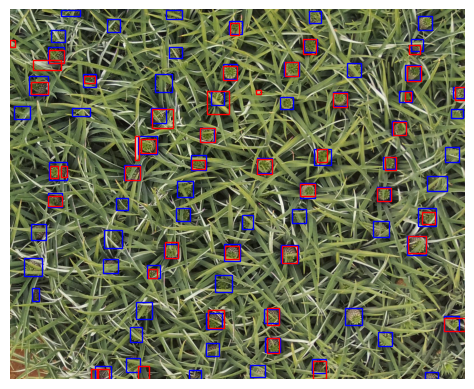

In [10]:
import os 
from PIL import Image

image = Image.open(os.path.join(path_root_img, filename))
plot_bounding_boxes(image, true_labels, pred_labels)